# Excercise 1: Autoencoder

We have allready seen a simple MLP model for **MNIST** classification:

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Get the data as Numpy arrays
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Build a simple model
inputs = keras.Input(shape=(28, 28))
l1 = layers.experimental.preprocessing.Rescaling(1.0 / 255)(inputs)
l2 = layers.Flatten()(l1)
l3 = layers.Dense(128, activation="tanh")(l2)
l4 = layers.Dense(128, activation="tanh")(l3)
outputs = layers.Dense(10, activation="softmax")(l4)
model = keras.Model(inputs, outputs)
model.summary()

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")

# Train the model for 1 epoch from Numpy data
batch_size = 64
print("Fit on NumPy data")
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=1)

# Train the model for 1 epoch using a dataset
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)
print("Fit on Dataset")
history = model.fit(dataset, epochs=1)


D:\Programme\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Programme\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Programme\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Programme\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1)

11493376/11490434 [==============================] - 1s 0us/step


AttributeError: module 'tensorflow.python.keras.api._v1.keras.layers' has no attribute 'experimental'

Now we want to change this model and build an **autoencoder** for **MNIST**:

**1. change the network topology:** 
* use 5 dense layers to form "bottleneck" network (see lecture). 
* Layers 1+2 should be the encoder, 3 the lattent layer aner 4+5 the decoder
* remove the softmax (we are not doing a classification anymore)

**2. change the loss-function to compare input and output -> choose a suitable loss from https://keras.io/api/losses/**

**3. train the model**

**4. test the model**
* visualize input and output images to inspect the reconstruction quallity (use MATPLOTLIB *imshow*)
* implement a function to measure the reconstrunction error between in- and output
* change network size (number of neurons per layer) and training paramters to optimize the ressults 

**5. Outlier detection**
* plot a histogram over the the recostruction errors
* find a cutoff value and visualize the outliers

In [57]:
inputs = keras.Input(shape=(784,)) 
l3 = layers.Dense(128,activation="relu")(inputs)
l4 = layers.Dense(64, activation="relu")(l3)

l5 = layers.Dense(32, activation="relu")(l4)

l6 = layers.Dense(64, activation="relu")(l5)
l7 = layers.Dense(128, activation="relu")(l6)
outputs = layers.Dense(28*28, activation="sigmoid")(l7)

model = keras.Model(inputs, outputs)
model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_44 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_45 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_46 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_47 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_48 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_49 (Dense)             (None, 784)               1011

In [58]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss="binary_crossentropy")

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))

model.fit(x_train, x_train, batch_size=16, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 24s 398us/sample - loss: 0.1711
Epoch 2/20
60000/60000 [==============================] - 20s 326us/sample - loss: 0.1558
Epoch 3/20
60000/60000 [==============================] - 18s 300us/sample - loss: 0.1518
Epoch 4/20
60000/60000 [==============================] - 22s 361us/sample - loss: 0.1502
Epoch 5/20
60000/60000 [==============================] - 18s 294us/sample - loss: 0.1492
Epoch 6/20
60000/60000 [==============================] - 18s 298us/sample - loss: 0.1489
Epoch 7/20
60000/60000 [==============================] - 18s 305us/sample - loss: 0.1483
Epoch 8/20
60000/60000 [==============================] - 18s 296us/sample - loss: 0.1483
Epoch 9/20
60000/60000 [==============================] - 18s 307us/sample - loss: 0.1475
Epoch 10/20
60000/60000 [==============================] - 18s 304us/sample - loss: 0.1478
Epoch 11/20
60000/60000 [==============================] - 18s 303us/sample - loss: 0.1476
Epoch 12

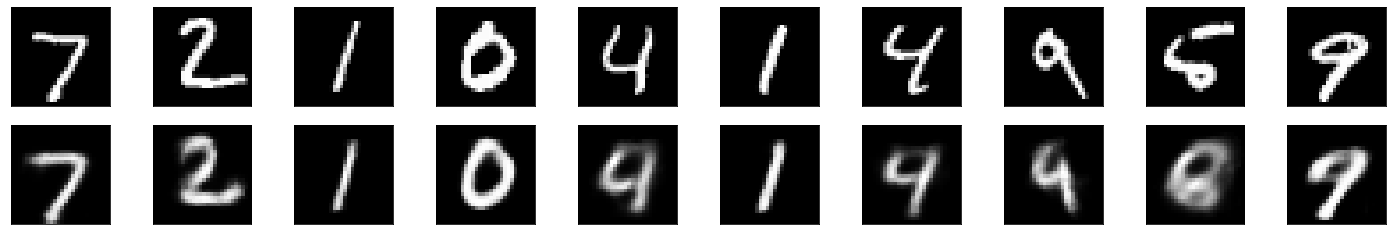

In [59]:
import matplotlib.pyplot as plt

x_test_reshaped = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

output = model.predict(x_test_reshaped)

# plot the first ten input images and then reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))
    
# input images on top row, reconstructions on bottom
for images, row in zip([x_test, output], axes):
       for img, ax in zip(images, row):
            ax.imshow(np.squeeze(img.reshape(28, 28)), cmap='gray')
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            

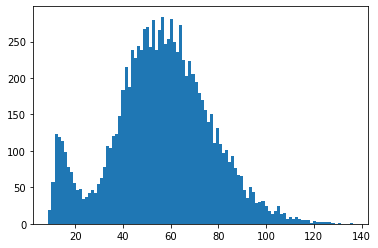

In [62]:
error = np.sum(np.abs(x_test_reshaped-output),axis=1)

t=plt.hist(error, bins=100)

In [64]:
outliears = x_test_reshaped[error>80]
outliear_pred = output[error>80]

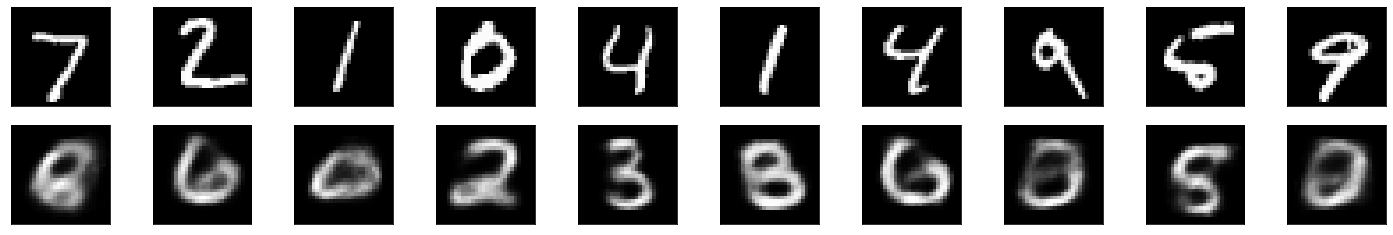

In [66]:
# plot the first ten input images and then reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))
    
# input images on top row, reconstructions on bottom
for images, row in zip([x_test_reshaped, outliear_pred], axes):
       for img, ax in zip(images, row):
            ax.imshow(np.squeeze(img.reshape(28, 28)), cmap='gray')
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            